# Lab1
Welcome to the Turtlebot4 Orientation Lab. Here you will learn to:
* Read data from the robots services
* Drive the robot around
* Accuracy of the odometry

Next, just execute the code cells below in sequence, read the comments, the output, and see what happens.

Don't worry, you can modify this code as you like. First, let's confirm you know how to run the code.

# Load Robot wrapper and initialize ROS
While the Turtlebot4 works using ROS2, you are using a wrapper around
ROS2 to make things more straight forward. 

You can inspect the wrapper by opening the file [/opt/robohub/humble/lib/python3.10/site-packages/turtlebot4_wrapper/\_\_init__.py](/opt/robohub/humble/lib/python3.10/site-packages/turtlebot4_wrapper/\_\_init__.py)

In [1]:
import turtlebot4_wrapper

turtlebot4_wrapper.use_hardware()
# turtlebot4_wrapper.use_simulation()

# load ROS library
import rclpy
if not rclpy.ok():
    rclpy.init()

# Instantiate Wrapper. The subscribes and publishes the relevant topics and connects the actions.
if not "robot" in globals():
    robot = turtlebot4_wrapper.Robot()

You are connected to uwbot-02
Robot is reachable


Could not determine the type for the passed topic


ros2 topic echo --once /ip failed. Proceed with caution.
ros2 topic subscription working. Everything is working as expected.


# Example: Read data from topics: Battery charge state
Check Battery State. Note: 10% get you 10 minutes of runtime.


In [2]:
# Make sure we have fresh data by waiting for a new message
robot.battery_state_future = rclpy.Future()
robot.spin_until_future_completed(robot.battery_state_future)

# Pretty print the contents of the message
print("Battery {0:2.3}%, charging with {1:2.2}A".format(
    robot.last_battery_state_msg.percentage*100,
    robot.last_battery_state_msg.current
))

Battery 99.0%, charging with 0.56A


# Example: Drive the robot via teleoperation
First, undock the robot using a preprogrammed behavior. Then open the visualization to drive the robot using buttons. After you are done, dock the robot again.

In [1]:
robot.undock()

NameError: name 'robot' is not defined

In [5]:
robot.open_visualization()

In [ ]:
print("You can additional move the robot with your phone:")
robot.open_visualization(open_url=False,mobile_layout=True,display_qrcode=True)

On the new webpage In the foxglove visualizer, you can drive the robot with panels in the bottom right hand corner. After you are done exploring, position the robot so that it is approximately 1-2m away from the dock and is pointing towards the dock.

In [2]:
robot.dock()

irobot_create_msgs.action.Dock_Result(is_docked=True)

# Example: Drive a square shape
In this example the robot automatically drives a square shape. While this is interesting to watch, it shows also some challenges. Before you execute this, mark the start position on the floor using tape as shown below (TODO: picture. Place your start position such that the robot has at least 0.5m space to the front and 0.5m to the left. Then execute the next cell. The code will also start a background logging process so you can analyze the data later.

In [14]:
# send_cmd_vel (forward_velocity, rotation_velocity, duration)
robot.reset_odometry() # make the robot think it is at position (0,0,0) 
robot.configure_logging(["/odom","/tf","/tf_static","/scan"]) # set topics which should be recorded
robot.start_logging() # start the background logging process
for iterations in range(10): # drive the square
    robot.set_cmd_vel(0.4, 0.0, 2.) # 0.1
    robot.set_cmd_vel(0.0, 0.5, 3.14)
    robot.set_cmd_vel(0.4, 0.0, 2.) # 0.1
    robot.set_cmd_vel(0.0, 0.5, 3.14)
    robot.set_cmd_vel(0.4, 0.0, 2.) # 0.1
    robot.set_cmd_vel(0.0, 0.5, 3.14)
    robot.set_cmd_vel(0.4, 0.0, 2.) # 0.1
    robot.set_cmd_vel(0.0, 0.5, 3.14)
logging_dir = robot.stop_logging()
log_data = robot.get_logging_data(logging_dir) # parse the logged data and import in python

Executing the next cell will open the log data in the visualizer.

In [15]:
robot.open_logging_data_in_visualizer(logging_dir)
robot.delete_logging_data(logging_dir)

In [3]:
# Plot data in the notebook
print("Collected {} samples".format(len(log_data['/odom'])))
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Wedge
fig,ax = plt.subplots(1)
ax.set_aspect('equal')
# TODO: decide if x forward is really the way to go
plt.xlim([-1.5,0.2])
plt.ylim([-0.2,1.5])
for msg in log_data['/odom'][::20]:
    T3D = robot.convert_odom_to_transform(msg[1].pose.pose)
    T2D = robot.reduce_transform_to_2D(T3D)
    circ = Circle((-T2D[1,2],T2D[0,2]),0.1) # TODO: correct radius
    circ.set_fill(False)
    ax.add_patch(circ)
    angle = robot.rotation_from_transform(T2D)
    import math
    angle = angle/math.pi*180
    wedge = Wedge((-T2D[1,2],T2D[0,2]),0.1, angle+180+45, angle+360-45)
    ax.add_patch(wedge)

NameError: name 'log_data' is not defined

From the experiment, please try to explain two aspect:
* Discrepancies between the commanded robot motion and the executed one
* Discrepancies between the measured motion and the one you observed
Try to come up with an answer and write it in the next field

# Use this field

Later, after you are done with this lab please save this notebook. Then commit the repository and push it. Detailled instructions will follow, but this is how you submit your work in this course.

# Example: Drive robot and aquire odometry
Tape measure, tape. Optional: Laser pointer.

* Tape two parallel lines `0.2m` apart on the floor. These are start and finish lines `0.2m`.
* Place the robot at the start line
* Read data from the Odometry topic
* Command the robot to drive `0.2m` straight
* Read data from the Odometry topic.
Did the robot travel `0.2m`? Where could the error come from?

Modify the experiment to investigate the behavior for rotation. Instead of the start and finish line attach a laser pointer to the base and aim it at a reference point. Command the robot to turn one full revolution.

Reading:
- Odometry sensor: TODO: find link
- Quaternions: https://en.wikipedia.org/wiki/Quaternion#Quaternions_and_the_space_geometry


In [5]:
# Use preprogrammed behavior: Drive off the dock in a controlled way
robot.undock()

irobot_create_msgs.action.Undock_Result(is_docked=False)

In [5]:
# Display raw data: Odometry based position
robot.odom_future = rclpy.Future()
pose1 = robot.spin_until_future_completed(robot.odom_future).pose.pose
print(pose1.position)
print(pose1.orientation)

geometry_msgs.msg.Point(x=-1.6481990883221442e-07, y=1.92818305322362e-07, z=-7.262618284542555e-10)
geometry_msgs.msg.Quaternion(x=0.0033984000328928232, y=-0.005702431313693523, z=1.8426591850584373e-05, w=0.9999779462814331)


In [6]:
# Drive with desired velocity command:
velocity_x = -0.3 # in m/s
velocity_phi = 0. # for rotation test use 0.5 rad/s
duration = 2. # in s
robot.set_cmd_vel(velocity_x, velocity_phi, duration)

In [7]:
# Display raw data: Odometry based position
robot.odom_future = rclpy.Future()
pose2 = robot.spin_until_future_completed(robot.odom_future).pose.pose
print(pose2.position)
print(pose2.orientation)

geometry_msgs.msg.Point(x=0.1877152919769287, y=-0.0005329698324203491, z=0.002335155615583062)
geometry_msgs.msg.Quaternion(x=0.003241100814193487, y=-0.006417444907128811, z=-4.1445640817983076e-05, w=0.9999741911888123)


In [8]:
# translation
print("Desired distance: {}".format(velocity_x*duration))
import numpy
print("Measured distance: {}".format(
    numpy.sqrt( (pose1.position.x - pose2.position.x)**2 + (pose1.position.y - pose2.position.y)**2 ) ))

# rotation
import eigenpy # makes use of the Eigen C++ library ()
def make_quaternion(q):
    return eigenpy.Quaternion(q.w,q.x,q.y,q.z)
print("Desired rotation: {}".format(
    velocity_phi * duration))
print("Measured rotation: {}".format(
    make_quaternion(pose1.orientation).angularDistance(make_quaternion(pose2.orientation))))


Desired distance: 0.2
Measured distance: 0.18771621395835128
Desired rotation: 0.0
Measured rotation: 0.0014691307362550087


# WALL FOLLOWING

## Required Functions for the state machine

In [3]:
from matplotlib import pyplot as plt
import numpy as np
import eigenpy # makes use of the Eigen C++ library ()
from geometry_msgs.msg import Twist


#reset the robot's positon to 0,0 on the map
robot.reset_odometry() # make the robot think it is at position (0,0,0) 
#Do required scans 
robot.odom_future = rclpy.Future()
robot.spin_until_future_completed(robot.odom_future)
pose = robot.last_odom_msg.pose.pose


def make_quaternion(q):
    return eigenpy.Quaternion(q.w,q.x,q.y,q.z)

# Plot lidar points from last message
def find_wall(msg = robot.last_scan_msg, pose = pose, threshold = 0.6):
    global closest_wall_angle
    global closest_wall_y_coord
    global closest_wall_x_coord
    global shortest_distance
    # Convert received lidar points into Cartesian coordinates considering the current position from odometry
    points = [(np.cos(angle) * radius, np.sin(angle) * radius) for angle, radius \
              in zip(np.linspace(msg.angle_min, msg.angle_max, len(msg.ranges)), msg.ranges)]

    T = robot.reduce_transform_to_2D(robot.convert_odom_to_transform(pose))

    # Remove points which cannot be measured
    filtered_points = filter(lambda x: np.isfinite(x).all(), points)

    #filter out points outside 3x3 and the 2 rods on the robot
    filtered_points = [pnt for pnt in filtered_points if abs(pnt[0]) <= 3 and abs(pnt[1]) <= 3]           
    filtered_points = [pnt for pnt in filtered_points if abs(pnt[0]) >= 0.2 and abs(pnt[1]) >= 0.2]     

    # Perform distance-based clustering for making all the line segments from points scanned
    #if points are close to each other then add them to a same cluster to build line segments
    clusters = []
    for point in filtered_points:
        assigned = False
        for cluster in clusters:
            point_array = np.array(point)  # Convert tuple to array
            cluster_arr = np.array(cluster[0])  # Convert tuple to array
            if np.linalg.norm(point_array[:2] - cluster_arr[:2]) <= threshold:  # Perform subtraction with arrays
                cluster.append(point)           #add point to cluster
                assigned = True
                break
        if not assigned:
            clusters.append([point])            #add point to new cluster

    #arbitary large value
    shortest_distance = 10000
    closest_line = []

    # Perofmring operations on each line segment
    for cluster in clusters:
        x_values = [point[0] for point in cluster]
        y_values = [point[1] for point in cluster]

       # performs squares regression, fitting a linear model to the data points represented by X and y_values.
        X = np.vstack([x_values, np.ones(len(x_values))]).T 
        m, b = np.linalg.lstsq(X, y_values, rcond=None)[0]              #slope and y-intercept

        # Generate lines using y = m*x + b
        line_x = np.array([min(x_values), max(x_values)])
        line_y = m * line_x + b                         
        

        #end points of line segment               e.g.  x1 ________ x2
        x1 = line_x[0]
        x2 = line_x[1]
        y1 = line_y[0]
        y2 = line_y[1]
        
        angle =  np.arctan(m)
        #find closest line
        distance = abs((x1*y2 -x2*y1)/(np.sqrt((x2-x1)**2+(y2-y1)**2))) 
        if ((distance < shortest_distance)):
            shortest_distance = distance
            closest_wall_y_coord = y1
            closest_wall_x_coord = (x1+x2)/2
            closest_wall_angle = angle

        # uncomment if you want to see the plot
        # plt.plot(line_x, line_y , color = 'blue')                             #plot each line segment
        

    # uncomment if you want to see the plot
    # plt.plot([pose.position.x], [pose.position.y], 'bx' , color =  'red')     #display the robot as a red cross
    # plt.gca().invert_yaxis()
    # plt.gca().invert_xaxis()
    # plt.show()

def scan():
    robot.odom_future = rclpy.Future()
    # robot.spin_until_future_completed(robot.scan_future);
    robot.spin_until_future_completed(robot.odom_future)
    # scan = robot.last_scan_msg
    pose = robot.last_odom_msg.pose.pose
    find_wall(robot.last_scan_msg, pose, threshold)
    
# Example usage
threshold = 0.6  # Maximum distance between points to be considered in the same cluster(line segment)
find_wall(robot.last_scan_msg, pose, threshold)



## SM TO FOLLOW WALL

In [6]:
# STATE MACHINE LIKE IMPLEMTATION:

# set default variables
duration = 3 # in s
velocity_x = 0 # in m/s
closest_wall_angle = 0
threshold = 0.6
closest_wall_y_coord = 0
command_success = None
velocity = Twist()
robot.reset_odometry() # make the robot think it is at position (0,0,0)
shortest_distance = 0

# States: Facing wall , parallel to wall , facing inward with the wall to the left or right , facing outward with the wall to the left or right
while(True):
    #Do required scans 
    scan()
    print(closest_wall_angle)
    print(closest_wall_y_coord)

    #if facing wall then turn around 90 degrees
    if (abs(closest_wall_angle) < 0.1):
        velocity_phi = np.pi/4
        velocity_x = 0.
        print("Rotate 90")
    
    #if parallel to wall move straight
    elif(closest_wall_angle < 1.35 and closest_wall_angle > 1.60):
        velocity_x = 0.1
        print("dis",shortest_distance)
        velocity_phi = 0.05 * (3.14/2 - closest_wall_angle)
        print("move straight")
    else:
        velocity_x = 0.1                                   # to induce an arc
        if (closest_wall_y_coord < 0):                      # facing towards the wall but at an angle
            if(closest_wall_angle > 0 ):                    # wall towards left of robot
                print("wall is left -> turning outward")
                velocity_phi = -0.04*3                          #NEGATIVE*POS
                
            else:                                           # wall towards right of robot
                print("wall is right -> turning outward")
                velocity_phi = 0.04*3                           #NEG*NEG

        else:                                               # facing away from the wall but at an angle
            if(closest_wall_angle < 0 ):                    # wall towards left of robot
                print("wall is left -> turning inward")
                velocity_phi = 0.04*3                           #POS*NEG
            else:                                           # wall towards right of robot
                print("wall is right -> turning inward")
                velocity_phi = -0.04*3                          #POS*POS
    
    #if closest wall angle is pos vel_phi is neg
    
    # robot.set_cmd_vel(velocity_x, velocity_phi, 3.5)
    #command_success = robot.set_cmd_vel(velocity_x, velocity_phi, 3)   # set command velocity
    #print(command_success)
    msg = Twist()
    msg.linear.x = velocity_x
    msg.angular.z = velocity_phi
    print("vel",velocity_phi)
    robot.cmd_vel_publisher.publish(msg)


KeyboardInterrupt: 

## CONTROLLER METHOD (Better)

In [17]:
msg = Twist()
shortest_distance = 10000
flag = 0
count = 0
avg_distance_from_wall = 0


'''
LOGIC:
2 types of movement => distance setting and straightening
flag  == 1 takes care of distance and flag == 0 of straightening
IDEALLY WOULD COMBINE BOTH INTO ONE LINEAR EQ (couldn't find a sutitable equation to do so)

Implementation:
WHile straightening if average distance over last 100 cycles is not within desired then switch to straightening and run x times and then switch back
repeat

We use average distance because sometimes the lidar returns faulty values for distance sensing
'''
scan()
if (abs(closest_wall_angle) < 0.3):
    msg.linear.x = 0.0
    msg.angular.z = -1
    robot.cmd_vel_publisher.publish(msg)


while(True):
    scan()
    velocity_x =  0.1

    if (flag == 1):
        count += 1
        velocity_phi = (shortest_distance-0.5)*closest_wall_x_coord*0.7   #DISTANCE SETTING VEL_PHI

        if (count == 50):
            count = 0
            flag = 0
            print("SWITCHING TO WALL FOLLOWING")
    
    else:
        count += 1
        velocity_phi = -closest_wall_angle*0.2                             #WALL FOLLOWING  VEL_PHI
        avg_distance_from_wall += shortest_distance
        if (count  == 100):
            count = 0
            distance_check = avg_distance_from_wall/100 
            if (abs(avg_distance_from_wall - 0.5) > 0.07):
                print("SWITCHING TO DISTANCE CORRECTION")
                flag = 1
            avg_distance_from_wall = 0
        
        
    



    msg.linear.x = velocity_x
    msg.angular.z = velocity_phi
    robot.cmd_vel_publisher.publish(msg)


/tmp/ipykernel_4706/3166876119.py:78: RuntimeWarning: invalid value encountered in double_scalars
  distance = abs((x1*y2 -x2*y1)/(np.sqrt((x2-x1)**2+(y2-y1)**2)))


SWITCHING TO DISTANCE CORRECTION


KeyboardInterrupt: 

# COLLISSION AVOIDANCE

## STATIC PATH CREATING AVOIDANCE

### CLASS FOR ARTIFICIAL POTENTIAL FIELD

obstacles: [(-1.4741369499014476, -0.39445699739007517), (-1.4706435197199117, -0.407288236707821), (-1.4285838484640663, -0.4090770282160527), (-1.3386614392990848, -0.3959818533099788), (-1.3045544199245678, -0.3982884180991932), (-1.2647882349101442, -0.3982294000637457), (-1.194687067465994, -0.38763244992804785), (-1.1628098838747232, -0.3885216270741884), (-1.1064230033254547, -0.38043138315651237), (-1.078553277898152, -0.3813908086563408), (-1.0281961528817163, -0.3736959078623824), (-1.004290185566311, -0.374947036828086), (-0.9486943791963881, -0.36364136284068654), (-0.868022685281762, -0.3501893747648233), (-0.8649380356399833, -0.3577403735464946), (-0.8433734509565559, -0.3574594213974671), (-0.8255499102078592, -0.35842335699623723), (-0.7968094951078833, -0.3542295751562032), (-0.7791292037488593, -0.35453306542289714), (-0.7596921019979582, -0.3537116189252833), (-0.7511638406593818, -0.35773860995187584), (-0.7372291007244174, -0.35901704878023927), (-0.57495454829388

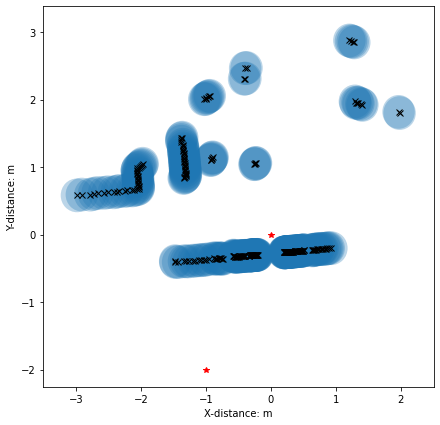

path plan failed


NameError: name 'x_co' is not defined

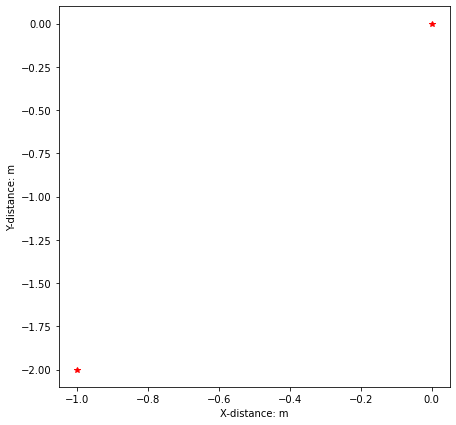

In [3]:
import math
import random
from matplotlib import pyplot as plt
from matplotlib.patches import Circle
import time
import numpy as np


class Vector2d():

    def __init__(self, x, y):
        self.deltaX = x
        self.deltaY = y
        self.length = -1
        self.direction = [0, 0]
        self.vector2d_share()

    def vector2d_share(self):
        if type(self.deltaX) == type(list()) and type(self.deltaY) == type(list()):
            deltaX, deltaY = self.deltaX, self.deltaY
            self.deltaX = deltaY[0] - deltaX[0]
            self.deltaY = deltaY[1] - deltaX[1]
            self.length = math.sqrt(self.deltaX ** 2 + self.deltaY ** 2) * 1.0
            if self.length > 0:
                self.direction = [self.deltaX / self.length, self.deltaY / self.length]
            else:
                self.direction = None
        else:
            self.length = math.sqrt(self.deltaX ** 2 + self.deltaY ** 2) * 1.0
            if self.length > 0:
                self.direction = [self.deltaX / self.length, self.deltaY / self.length]
            else:
                self.direction = None

    def __add__(self, other):
        """
        :param other:
        :return:
        """
        vec = Vector2d(self.deltaX, self.deltaY)
        vec.deltaX += other.deltaX
        vec.deltaY += other.deltaY
        vec.vector2d_share()
        return vec

    def __sub__(self, other):
        vec = Vector2d(self.deltaX, self.deltaY)
        vec.deltaX -= other.deltaX
        vec.deltaY -= other.deltaY
        vec.vector2d_share()
        return vec

    def __mul__(self, other):
        vec = Vector2d(self.deltaX, self.deltaY)
        vec.deltaX *= other
        vec.deltaY *= other
        vec.vector2d_share()
        return vec

    def __truediv__(self, other):
        return self.__mul__(1.0 / other)

    def __repr__(self):
        return 'Vector deltaX:{}, deltaY:{}, length:{}, direction:{}'.format(self.deltaX, self.deltaY, self.length,
                                                                             self.direction)


class APF():


    def __init__(self, start: (), goal: (), obstacles: [], k_att: float, k_rep: float, rr: float,
                 step_size: float, max_iters: int, goal_threshold: float, is_plot=False):
        """
        :param start:
        :param goal: 
        :param obstacles: 
        :param k_att: 
        :param k_rep: 
        :param rr: 
        :param step_size: 
        :param max_iters:
        :param goal_threshold: 
        :param is_plot: 
        """
        self.start = Vector2d(start[0], start[1])
        self.current_pos = Vector2d(start[0], start[1])
        self.goal = Vector2d(goal[0], goal[1])
        self.obstacles = [Vector2d(OB[0], OB[1]) for OB in obstacles]
        self.k_att = k_att
        self.k_rep = k_rep
        self.rr = rr  
        self.step_size = step_size
        self.max_iters = max_iters
        self.iters = 0
        self.goal_threashold = goal_threshold
        self.path = list()
        self.is_path_plan_success = False
        self.is_plot = is_plot
        self.delta_t = 0.01

    def attractive(self):

        att = (self.goal - self.current_pos) * self.k_att 
        return att

 

class APF_Improved(APF):
    def __init__(self, start: (), goal: (), obstacles: [], k_att: float, k_rep: float, rr: float,
                 step_size: float, max_iters: int, goal_threshold: float, is_plot=False):
        self.start = Vector2d(start[0], start[1])
        self.current_pos = Vector2d(start[0], start[1])
        self.goal = Vector2d(goal[0], goal[1])
        self.obstacles = [Vector2d(OB[0], OB[1]) for OB in obstacles]
        self.k_att = k_att
        self.k_rep = k_rep
        self.rr = rr 
        self.step_size = step_size
        self.max_iters = max_iters
        self.iters = 0
        self.goal_threashold = goal_threshold
        self.path = list()
        self.is_path_plan_success = False
        self.is_plot = is_plot
        self.delta_t = 0.01

    def repulsion(self):
  
        rep = Vector2d(0, 0)  
        for obstacle in self.obstacles:
            # obstacle = Vector2d(0, 0)
            obs_to_rob = self.current_pos - obstacle
            rob_to_goal = self.goal - self.current_pos
            if (obs_to_rob.length > self.rr): 
                pass
            else:
                rep_1 = Vector2d(obs_to_rob.direction[0], obs_to_rob.direction[1]) * self.k_rep * (
                        1.0 / obs_to_rob.length - 1.0 / self.rr) / (obs_to_rob.length ** 2) * (rob_to_goal.length ** 2)
                rep_2 = Vector2d(rob_to_goal.direction[0], rob_to_goal.direction[1]) * self.k_rep * ((1.0 / obs_to_rob.length - 1.0 / self.rr) ** 2) * rob_to_goal.length
                rep +=(rep_1+rep_2)
        return rep

    def path_plan(self):
        """
        path plan
        :return:
        """
        while (self.iters < self.max_iters and (self.current_pos - self.goal).length > self.goal_threashold):
            f_vec = self.attractive() + self.repulsion()
            self.current_pos += Vector2d(f_vec.direction[0], f_vec.direction[1]) * self.step_size
            self.iters += 1
            self.path.append([self.current_pos.deltaX, self.current_pos.deltaY])
            if self.is_plot:
                # plt.plot(self.current_pos.deltaX, self.current_pos.deltaY, '.b')
                plt.pause(self.delta_t)
        if (self.current_pos - self.goal).length <= self.goal_threashold:
            self.is_path_plan_success = True


if __name__ == '__main__':
    # robot.reset_odometry()

    k_att, k_rep = 1.0, 1.0
    rr =  0.25 #3
    step_size, max_iters, goal_threashold = .2, 500 , .2 
    step_size_ = .2

    start, goal = (0, 0), (-1, -2)
    is_plot = True
    if is_plot:
        fig = plt.figure(figsize=(7, 7))
        subplot = fig.add_subplot(111)
        subplot.set_xlabel('X-distance: m')
        subplot.set_ylabel('Y-distance: m')
        subplot.plot(start[0], start[1], '*r')
        subplot.plot(goal[0], goal[1], '*r')

    ################
    robot.odom_future = rclpy.Future()
    robot.spin_until_future_completed(robot.odom_future)
    pose = robot.last_odom_msg.pose.pose
    msg = robot.last_scan_msg



    points = [(np.cos(angle) * radius, np.sin(angle) * radius) for angle, radius \
                in zip(np.linspace(msg.angle_min, msg.angle_max, len(msg.ranges)), msg.ranges)]

    T = robot.reduce_transform_to_2D(robot.convert_odom_to_transform(pose))

    # Remove points which cannot be measured
    objects = filter(lambda x: np.isfinite(x).all(), points)

    #filter out points outside 3x3 and the 2 rods on the robot
    objects = [pnt for pnt in objects if abs(pnt[0]) <= 3 and abs(pnt[1]) <= 3]           
    obs = [pnt for pnt in objects if abs(pnt[0]) >= 0.2 and abs(pnt[1]) >= 0.2] 


    ########################
    print('obstacles: {0}'.format(obs))
    for i in range(0):
        obs.append([random.uniform(2, goal[1] - 1), random.uniform(2, goal[1] - 1)])

    if is_plot:
        for OB in obs:
            circle = Circle(xy=(OB[0], OB[1]), radius=rr, alpha=0.3)
            subplot.add_patch(circle)
            subplot.plot(OB[0], OB[1], 'xk')
    # t1 = time.time()
    # for i in range(1000):

    # path plan
    if is_plot:
        apf = APF_Improved(start, goal, obs, k_att, k_rep, rr, step_size, max_iters, goal_threashold, is_plot)
    else:
        apf = APF_Improved(start, goal, obs, k_att, k_rep, rr, step_size, max_iters, goal_threashold, is_plot)
    apf.path_plan()
    if apf.is_path_plan_success:
        path = apf.path
        path_ = []
        i = int(step_size_ / step_size)
        while (i < len(path)):
            path_.append(path[i])
            i += int(step_size_ / step_size)
        # print("path len = " , len(path))
        if path_[-1] != path[-1]:  
            path_.append(path[-1])
        x_co = []
        y_co = []
        for point in path_:
            print(point)
            x_co.append(point[0])
            y_co.append(point[1])
            
        print('planed path points:{}'.format(path_))
        print('path plan success')
        if is_plot:
            px, py = [K[0] for K in path_], [K[1] for K in path_]  
            
            subplot.plot(px, py, '^k')
            plt.show()
    else:
        print('path plan failed')

    
    fig = plt.figure(figsize=(7, 7))
    subplot = fig.add_subplot(111)
    subplot.set_xlabel('X-distance: m')
    subplot.set_ylabel('Y-distance: m')
    subplot.plot(start[0], start[1], '*r')
    subplot.plot(goal[0], goal[1], '*r')
    subplot.plot(x_co ,y_co , '.')
    for OB in obs:
        circle = Circle(xy=(OB[0], OB[1]), radius=rr, alpha=0.06)
        subplot.add_patch(circle)
        subplot.plot(OB[0], OB[1], 'xk')
    plt.show()


## POINT TO POINT

In [40]:
import numpy as np
from tf_transformations import euler_from_quaternion
from geometry_msgs.msg import Twist
import time
import eigenpy
import numpy

#This is just testing quaternions
robot.reset_odometry() # make the robot think it is at position (0,0,0) 

(desiredx,desiredy) = (-1,0)
desired_yaw = 0.
pause_flag = 0
start_time = time.time()
msg = Twist()

if (desiredx < 0):
    robot.set_cmd_vel(0 , 2.7 , 1.5)


while True:

    # Localization

    robot.odom_future = rclpy.Future()
    pose = robot.spin_until_future_completed(robot.odom_future).pose.pose
    (currentx, currenty) = (pose.position.x, pose.position.y)
    # orientation_list = [pose.orientation.x,pose.orientation.y,pose.orientation.z,pose.orientation.w] # covert to euler and get and set yaw
    (roll,pitch,yaw) = euler_from_quaternion([pose.orientation.x,pose.orientation.y,pose.orientation.z,pose.orientation.w])

    # Navigation
    distance = np.sqrt((np.square(desiredx-currentx))+(np.square(desiredy-currenty)))
    angle_goal = np.arctan2((desiredy-currenty),(desiredx-currentx))

    
    print("\rdistance",distance,"angle",yaw,"angle_goal",angle_goal,end="")

    if distance>0.01:
        msg.linear.x = min(0.1, 1. * distance)
        msg.angular.z = 0.25 * ( angle_goal-yaw)
        # msg.angular.z = max(-0.4,min(0.4, 0.25 * ( angle_goal-yaw)))
    else:
    #velocity_x = 0.01*(time.time() - start_time)
        msg.angular.z = 0.25 * (desired_yaw-yaw)
    robot.cmd_vel_publisher.publish(msg)
    
    if(distance<0.03 and abs(desired_yaw-yaw)<0.05):
        break

KeyboardInterrupt: 

In [22]:
import numpy as np

from tf_transformations import euler_from_quaternion

from geometry_msgs.msg import Twist

import time

import eigenpy




#Quaternion test




(desiredx,desiredy) = (-1,0)
msg = Twist()




def goTo(desiredx,desiredy,desired_yaw):

    while True:

        # Localization

        robot.odom_future = rclpy.Future()

        pose = robot.spin_until_future_completed(robot.odom_future).pose.pose

        (currentx, currenty) = (pose.position.x, pose.position.y)

        yaw = np.arctan2(2 * (pose.orientation.w * pose.orientation.z + pose.orientation.x * pose.orientation.y),1 - 2 * (pose.orientation.y ** 2 + pose.orientation.z ** 2))

       

        # Navigation

        distance = np.sqrt((np.square(desiredx-currentx))+(np.square(desiredy-currenty)))
        angle_goal = np.arctan2((desiredy-currenty),(desiredx-currentx))

    

        angle_diff_rad = np.arctan2(np.sin(angle_goal-yaw), np.cos(angle_goal-yaw))
        vel_dir =  1*angle_diff_rad


        print("\rdistance",distance,"angle",yaw,"angle_goal",angle_goal,end="")

  

        if distance>0.01:

            msg.linear.x = min(0.05, 1. * distance)

            msg.angular.z = max(-0.4,min(0.4, 0.25 * (vel_dir)))

        else:

        #velocity_x = 0.01*(time.time() - start_time)

            msg.angular.z = max(-0.1,min(0.1, 0.25 * (desired_yaw-yaw)))

        robot.cmd_vel_publisher.publish(msg)

        if(distance<0.05 and abs(desired_yaw-yaw)<0.05):
            print("Reached point\n")
            break

points  = [(1 , 0) , (1, -0.5) , (1.5 ,-0.8)]#Notes When the distance or angle between the current point and the next point is very small it seems like we cant pass the command threshold

robot.reset_odometry()
for p in points:

    goTo(p[0],p[1],0)

distance 0.04954794792876761 angle -0.011772276104439995 angle_goal -0.06722462603852661Reached point0866862329444angle_goal -0.0013955415194909654
distance 0.11102064461899593 angle 1.196488199146662 angle_goal -0.5219739651110786774 angle 2.7551036024721705 angle_goal 0.4330644959941812angle_goal -0.7206360740957343

KeyboardInterrupt: 